## Customer Churn Using Machine Learning

### Customer churn, also known as client attrition, is the phrase used to describe the likelihood of a current 

### customer continuing to do business with the company. In today's harsh market circumstances, it's critical for businesses to

### keep track of customer churn and the numerous reasons why customers leave doing business with them. So it is important for 

### comapnies to target those customers who are at risk. Machine learning helps us to get the desired result.

### The first step is to import data and the data source is Kaggle
#### https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/data





In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv("C:/Users/Farhan Rizvi/Desktop/Churn_Modelling.csv")

# 1. Display top 5 Rows of The Dataset









In [57]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###  Details are variables are listed below :
####  1) Row Number → It shows the row number and does not have any influence on Output.
#### 2) Customer ID→ It shows Id’s of the customer and has no effect on output
####  3) Surname→ It shows surname of all the customers 
####  4) Credit Score→ It shows credit score of a customer and customer who have high credit score proves they won’t leave the bank 
####  5) Geography→ It shows location of the customer.
####  6) Gender→ It helps us to show whether the churning of customer depends upon Gender.
####  7) Age→ This is important since elderly clients are less likely than younger customers to leave their bank.
####  8) Tenure→ It shows time period in years till when customer has been a client of the bank. The older clients are more loyal to bank
####  9) Balance→ It shows balance.
####  10) NumOfProducts→ It tells products purchased by consumers
####  11)HasCrCard→ It shows if people have credit card or not.
####  12) IsActiveMember→ It shows that there is less chance that active customer will leave the bank.
####  13) Estimated Salary→ as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
#### 14) Exited→ It shows will the customer leave the bank or will not leave the bank.

 

# 2. Display Last 5 rows of The Dataset

In [58]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# 3. Find Shape of the dataset

In [59]:
data.shape

(10000, 14)

# 4. Get information about our dataset like Total number of rows, Total number of columns, Data types of each column and Memory Requirements

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 976.6+ KB


# 5. Check Null Values

### There is no null values in my data set

In [61]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# EDA (Exploratory Data Analysis)


## Heat Map


### Age has an association with Exited status, implying that age is one of the reasons driving this process. We'll look at this in more detail later in this notebook when we look at Age and Exit status. There is also no relation between the independent variables, showing that multicollinearity is absent.


<AxesSubplot:>

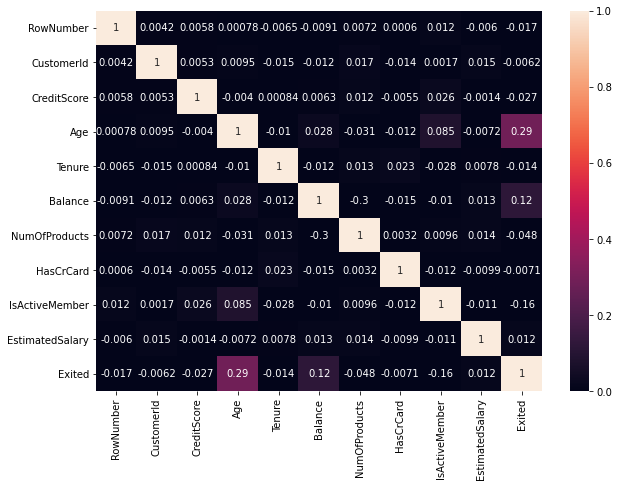

In [62]:
plt.figure(figsize=(10,7)),
sns.heatmap(data.corr(),vmin=0, vmax=1,annot=True)

# Continious Variable Distribution

<AxesSubplot:xlabel='Balance', ylabel='Count'>

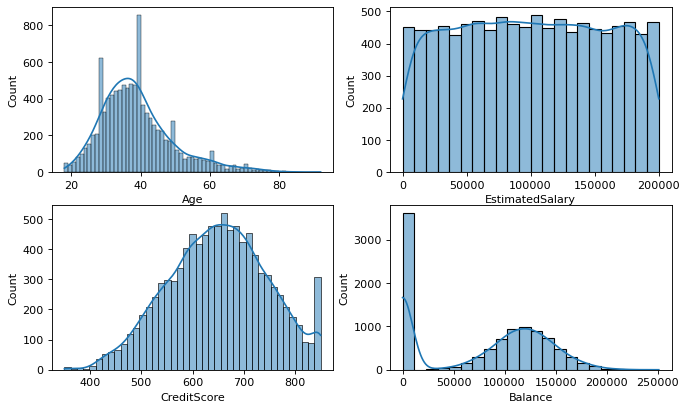

In [64]:
plt.figure(figsize=(10, 6), dpi=80)

plt.subplot(221)
sns.histplot(data["Age"], kde=True) 

plt.subplot(222)
sns.histplot(data["EstimatedSalary"], kde=True)

plt.subplot(223)
sns.histplot(data["CreditScore"], kde=True)

plt.subplot(224)
sns.histplot(data["Balance"], kde=True)

## Insights 

### • Most of the customer's age  are in range of 30-40

### • Our customers' estimated salaries are equally distributed, which means we have roughly the same number              of customers for all different estimated salaries.

### •  As we can see mostly the credit card score is less than 700 which means we have more non- relaible customers as credit card score less than 700 is not considered good.

### • Balance is also normally distributed except 3600 customers who have 0 balance.

# Let's visualize continious variables with respect to exit

Text(0.5, 1.0, 'Exited vs Credit Score')

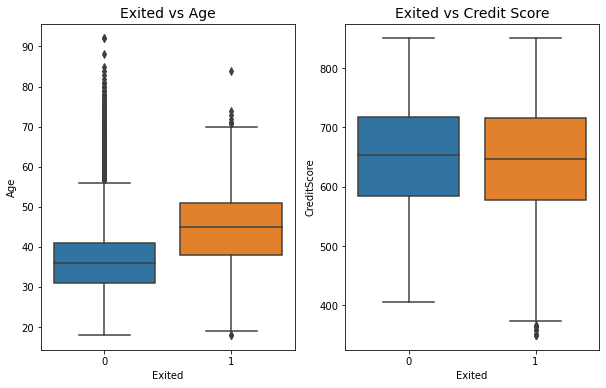

In [65]:


plt.figure(figsize=(10, 6))

plt.subplot(121)
sns.boxplot(x="Exited", y="Age", data=data)
plt.title("Exited vs Age", fontdict={"fontsize": 14, "fontweight":500})

plt.subplot(122)
sns.boxplot(x="Exited", y="CreditScore", data=data)
plt.title("Exited vs Credit Score", fontdict={"fontsize": 14, "fontweight":500})

### Insights from above graph

#### Age is a crucial factor in determining customer churn, with older customers churning more frequently than younger customers. And we already saw in the correlation diagram that Exited Status was connected to Age.

#### It's difficult to tell whether a client is likely to churn based on their credit score because the behaviour is nearly identical for both..As a result, credit score is not one of the factors to evaluate.


Text(0.5, 1.0, 'Exited vs Estimated Salary')

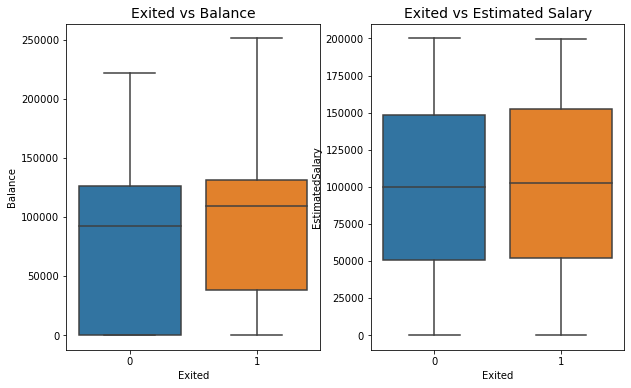

In [66]:


plt.figure(figsize=(10, 6))

plt.subplot(121)
sns.boxplot(x="Exited", y="Balance", data=data)
plt.title("Exited vs Balance", fontdict={"fontsize": 14, "fontweight":500})

plt.subplot(122)
sns.boxplot(x="Exited", y="EstimatedSalary", data=data)
plt.title("Exited vs Estimated Salary", fontdict={"fontsize": 14, "fontweight":500})

### Insights from above graphs:

#### •	Those with a large balance tend to churn a little more than customers with a low balance.

#### •	For both statuses, the estimated salary displays the same behaviour.


Text(0.5, 1.0, 'Exited vs Tenure')

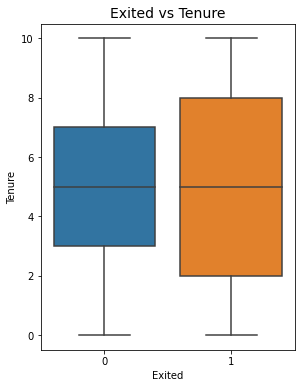

In [67]:


plt.figure(figsize=(10, 6))

plt.subplot(121)
sns.boxplot(x="Exited", y="Tenure", data=data)
plt.title("Exited vs Tenure", fontdict={"fontsize": 14, "fontweight":500})

### •	Tenure exhibits comparable behavior, but we can see that consumers with an average tenure with the bank are more likely to stay. 

### Categorical Variable visualization 

Text(0.5, 1.0, 'frequency of male and female')

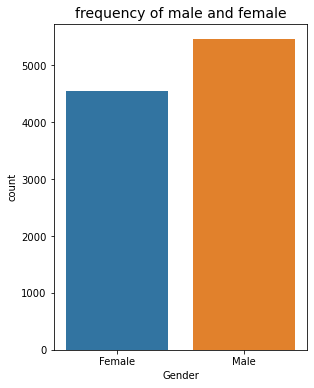

In [68]:
# let's visualize categorical variables 

plt.figure(figsize=(10, 6))

plt.subplot(121)
sns.countplot(x="Gender", data=data)
plt.title("frequency of male and female", fontdict={"fontsize": 14, "fontweight":500})

### Here we can see that majority of the customers are male.

Text(0.5, 1.0, 'Description of Tenure')

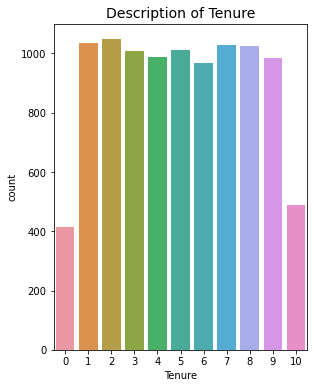

In [69]:

plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.countplot(x="Tenure", data=data)
plt.title("Description of Tenure", fontdict={"fontsize": 14, "fontweight":500})

### •	The most of the customer have healthy relationship with the bank for 1 to 9 years.

Text(0.5, 1.0, 'Products used by customers')

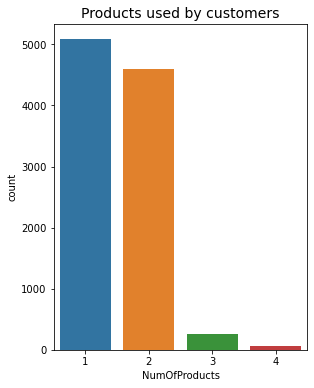

In [70]:

plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.countplot(x="NumOfProducts", data=data)
plt.title("Products used by customers", fontdict={"fontsize": 14, "fontweight":500})

### •	The majority of our consumers use one of our bank products, followed by two others.

Text(0.5, 1.0, 'Credit Card description')

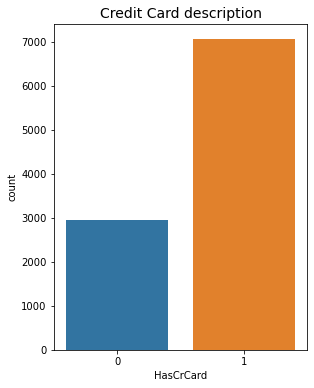

In [71]:

plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.countplot(x="HasCrCard", data=data)
plt.title("Credit Card description", fontdict={"fontsize": 14, "fontweight":500})

### •	More than 70 percent customer use credit card. 

Text(0.5, 1.0, 'Active and non active member description')

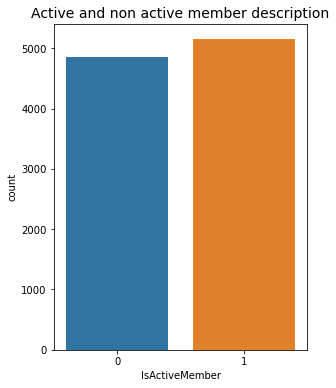

In [72]:

plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.countplot(x="IsActiveMember", data=data)
plt.title("Active and non active member description" ,fontdict={"fontsize": 14, "fontweight":500})

### •we have nearly the same amount of digitally active and inactive consumers. 

# 6. Get Statistics about the Dataset

In [73]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### •	We have 10,000 customers data
### •	The credit score ranges between 350 and 850
### •	Customers can be as young as 18 years old and as old as 92 years old.
### •	Maximum tenure of customer is 10 years.
### •	Our consumers use at least one of our bank's products and up to four.
### •	Many clients have only one credit card, and we also have customers who do not have any credit cards.


# 7. Dropping irrelevant columns 

### Here we have to drop irrelevant columns as they are of no use in building machine learning model

In [74]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [75]:
data=data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [76]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 8. Encoding categorical data

### Encoding categorical variable is important because Machine learning Algorithms only understand numeric values.

In [77]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [78]:
data = pd.get_dummies(data, drop_first= True)

In [79]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


#  Imbalanced Data set

### Here we can see that our data is imbalanced due to which our machine learning model will be biased towards our majority class as we can see here.

In [80]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [81]:
import seaborn as sns

C:\Users\Farhan Rizvi\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

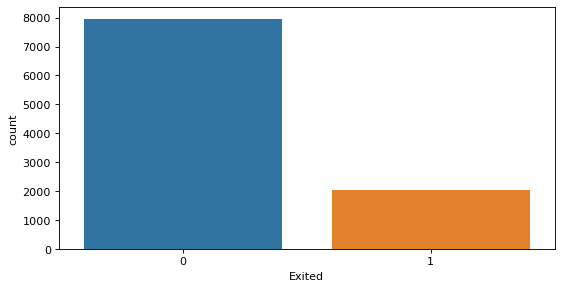

In [82]:
plt.figure(figsize=(8, 4), dpi=80)
sns.countplot(data['Exited'])


In [83]:
x=data.drop('Exited',axis=1)
y=data['Exited']

# 9. Handling Imbalanced Dataset with SMOTE

### Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input. This implementation of SMOTE does not change the number of majority cases.

In [84]:

from imblearn.over_sampling import SMOTE


In [85]:
x_res,y_res= SMOTE().fit_resample(x,y)
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

# 10. Splitting the dataset into training and testing data set

#### When machine learning algorithms are used to make predictions on data that was not used to train the model, the train-test split process is used to measure their performance.

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test, y_train,y_test=train_test_split(x_res,y_res,test_size=0.20,random_state=42)

# 11.Feature Scaling

### Feature scaling is a strategy for reducing the values of all of our dataset's independent characteristics to the same scale. As machine learning algorithms do not understand units.

### Feature Scaling is of two types standardization and normalization

### Here we have standardize our data set with the help of standard scaler.


In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
sc=StandardScaler()

In [90]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [91]:
x_train

array([[ 0.32431364,  0.91197682, -0.65442288, ..., -0.57142857,
        -0.46275562,  1.17094613],
       [ 1.08638714,  0.10495553, -1.39227389, ..., -0.57142857,
        -0.46275562,  1.17094613],
       [ 0.89042538,  0.20583319, -1.02334838, ..., -0.57142857,
        -0.46275562, -0.85401025],
       ...,
       [ 0.19367246,  0.20583319,  1.19020464, ..., -0.57142857,
        -0.46275562,  1.17094613],
       [-0.72081575, -1.00469875,  0.08342813, ..., -0.57142857,
         2.16096782, -0.85401025],
       [ 0.52027539,  1.01285448, -1.39227389, ...,  1.75      ,
        -0.46275562,  1.17094613]])

# Logistic Regression

### Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
log=LogisticRegression()

In [94]:
log.fit(x_train,y_train)

LogisticRegression()

In [95]:
y_pred1=log.predict(x_test)

### Accuracy - Informally, accuracy is the fraction of predictions our model got right.



In [96]:
from sklearn.metrics import accuracy_score

In [97]:
accuracy_score(y_test,y_pred1)

0.7837413684871312

In [98]:
from sklearn.metrics import precision_score,recall_score

### Precison - The ability of model to classify positive values correctly 

### Recall - The ability of model to predict positive values.

In [99]:
precision_score(y_test,y_pred1)

0.7716981132075472

In [100]:
recall_score(y_test,y_pred1)

0.7900837089504186

# Plotting ROC curve.

### ROC curve -  An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. 

### It is a performance metrics which is use to check the performace of classification model 



In [101]:
from sklearn import metrics

In [102]:

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred1)


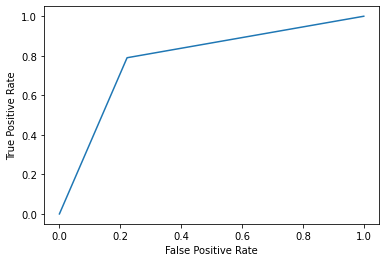

<Figure size 640x320 with 0 Axes>

<Figure size 640x320 with 0 Axes>

In [103]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.figure(figsize=(8, 4), dpi=80)

### AUC  -AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve

### 0.5 = No discrimination
### 0.5-0.7 = Poor discrimination
### 0.7-0.8 = Acceptable discrimination
### 0.8-0.9= Excellent discrimination
### >0.9 = Outstanding discrimination

In [104]:
auc = metrics.roc_auc_score(y_test, y_pred1)
print(auc)

0.7838967228156869


#  K NEIGHBOUR

### In this algorithm the data point  is classified on the basis of how its neighbours are classified.

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn= KNeighborsClassifier(n_neighbors=5)


In [107]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [108]:
y_pred3=knn.predict(x_test)

In [109]:
accuracy_score(y_test,y_pred3)

0.8317639673571877

In [110]:
precision_score(y_test,y_pred3)

0.8117719190680565

In [112]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred3)

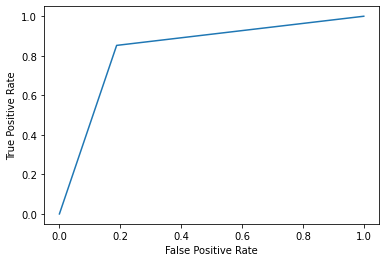

<Figure size 640x320 with 0 Axes>

<Figure size 640x320 with 0 Axes>

In [113]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.figure(figsize=(8, 4), dpi=80)

In [114]:
auc = metrics.roc_auc_score(y_test, y_pred3)
print(auc)

0.8322729568711015


# Decision Tree classifier:

### It is a tree like structure which directs the course of action . It consist of root node , decision node.

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
dt=DecisionTreeClassifier()

In [117]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [118]:
y_pred4=dt.predict(x_test)

In [119]:
accuracy_score(y_test,y_pred4)

0.7840552416823603

In [120]:
precision_score(y_test,y_pred4)

0.7591372079089275

In [122]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred4)

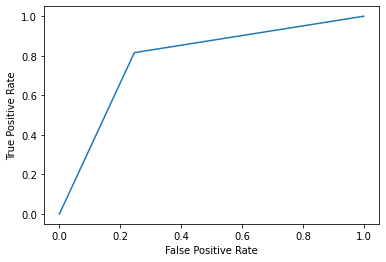

<Figure size 640x320 with 0 Axes>

<Figure size 640x320 with 0 Axes>

In [123]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.figure(figsize=(8, 4), dpi=80)

In [124]:
auc = metrics.roc_auc_score(y_test, y_pred4)
print(auc)

0.784833810387733


# Random Forest:

### Random forest is an ensemble technique in which we train bunch of models parellely and after that we take average of it . It improves the performance of model and reduce variance and biasness.

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rf=RandomForestClassifier()

In [127]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [128]:
y_pred5=rf.predict(x_test)

In [129]:
accuracy_score(y_test,y_pred5)

0.8662900188323918

In [130]:
precision_score(y_test,y_pred5)

0.8537350910232266

In [131]:
f1_score(y_test,y_pred5)

0.8645899554990464

In [132]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred5)

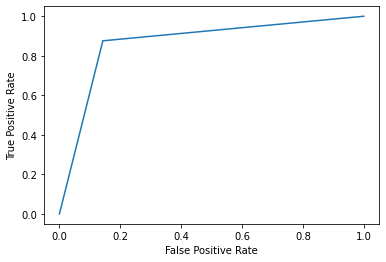

<Figure size 640x320 with 0 Axes>

<Figure size 640x320 with 0 Axes>

In [133]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.figure(figsize=(8, 4), dpi=80)

In [134]:
auc = metrics.roc_auc_score(y_test, y_pred5)
print(auc)

0.86652111217094


# Choose  The  Best Model on the basis of precision 

In [135]:
final_data_2=pd.DataFrame({'Models':['LR','KNN', 'DT', 'RF'],'PRECISION':
                         [precision_score(y_test,y_pred1),
                         
                         precision_score(y_test,y_pred3),
                         precision_score(y_test,y_pred4),
                         precision_score(y_test,y_pred5)]})

In [136]:
final_data_2

,Models,PRECISION
0,LR,0.771698
1,KNN,0.811772
2,DT,0.759137
3,RF,0.853735


C:\Users\Farhan Rizvi\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='PRECISION'>

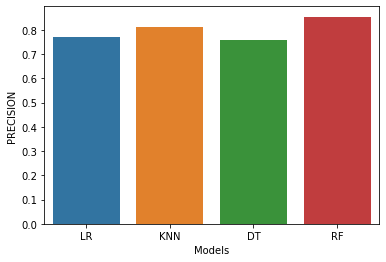

In [138]:
sns.barplot(final_data_2['Models'],final_data_2['PRECISION'])

### As we can see the Random forest has highest precision  so we will the choose random forest classifier. 

#  Save The Model

In [139]:
x_res=sc.fit_transform(x_res)

In [140]:
rf.fit(x_res,y_res)

RandomForestClassifier()

In [141]:
import joblib

In [142]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [143]:
model=joblib.load('churn_predict_model')

In [144]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

# Prediction 

In [ ]:
model.predict([[450,60,1,400,1,1,1,101,1,1,1]])

### Here after inserting attribute values of customer the output is [0] which states that there is a high chance this customer can leave the bank . So the bank's higher authority has to help this customer with better services to change his decison in favour of organization.